## 타이타닉호 생존율 분석

### 상관분석, 상관계수, 피어슨 상관계수, 히트맵

#### 데이터셋 수집 

#### 기본 패키지 import


In [49]:
import seaborn as sns
import pandas as pd

In [50]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [40]:
titanic.to_csv("./data/titanic.csv", index=True, encoding="utf-8")

#### 결측치 파악

In [4]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### age 결측치(177건)를 치환

- 891명 데이터에서 중앙값을 찾아서 결측치를 치환

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.age.median()

28.0

In [8]:
titanic.age.mean()

29.69911764705882

In [51]:
#나이 결측치 치환
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [52]:
# 승선장소 확인
titanic.embarked.value_counts()
 ##embark_town의 결측치 2개를 Southampton으로 넣기로 결정

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [53]:
titanic.embarked = titanic.embarked.fillna("S")

In [54]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [55]:
titanic.embark_town = titanic.embark_town.fillna("Southampton")

In [56]:
##승선 데크를 확인
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [57]:
titanic.deck = titanic.deck.fillna("C")

In [58]:
#결측치 여부 재조회
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [60]:
#생존자 확인(0:사망, 1:생존)
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

#### 차트 시각화

In [61]:
import matplotlib.pyplot as plt

##### 성별에 따른 생존률 파이차트

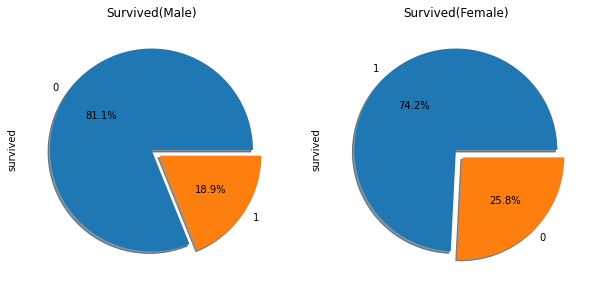

In [62]:
f, ax = plt.subplots(1, 2, figsize=(10,5)) #규격 만들기
titanic.survived[titanic.sex == "male"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[0], explode=[0,0.1], shadow=True)
#파이차트 만들기(autopct:생존율 비율 보여주기(%1.5f%%:x.5:소수점 5자리수까지), ax:차트 좌표(위치), explode:파이 서로 떨어뜨리는거, shadow:차트 그림자 넣기)
titanic.survived[titanic.sex == "female"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1], explode=[0,0.1], shadow=True)

ax[0].set_title("Survived(Male)")
ax[1].set_title("Survived(Female)")
plt.show()

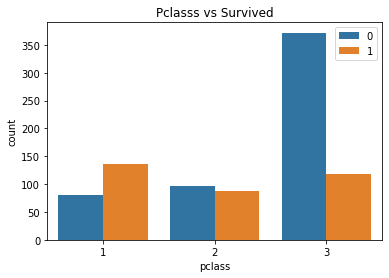

In [63]:
sns.countplot(data=titanic, x="pclass", hue="survived") #hue가 y값
plt.title("Pclasss vs Survived")
plt.legend()
plt.show()

#### 상관분석

#### 상관계수 확인

In [64]:
titanic_corr = titanic.corr(method="pearson")
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [65]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [67]:
titanic.survived.corr(titanic.adult_male)

-0.5570800422053257

#### 결과 시각화

##### 산점도(Scatter plot) 상관분석 시각화

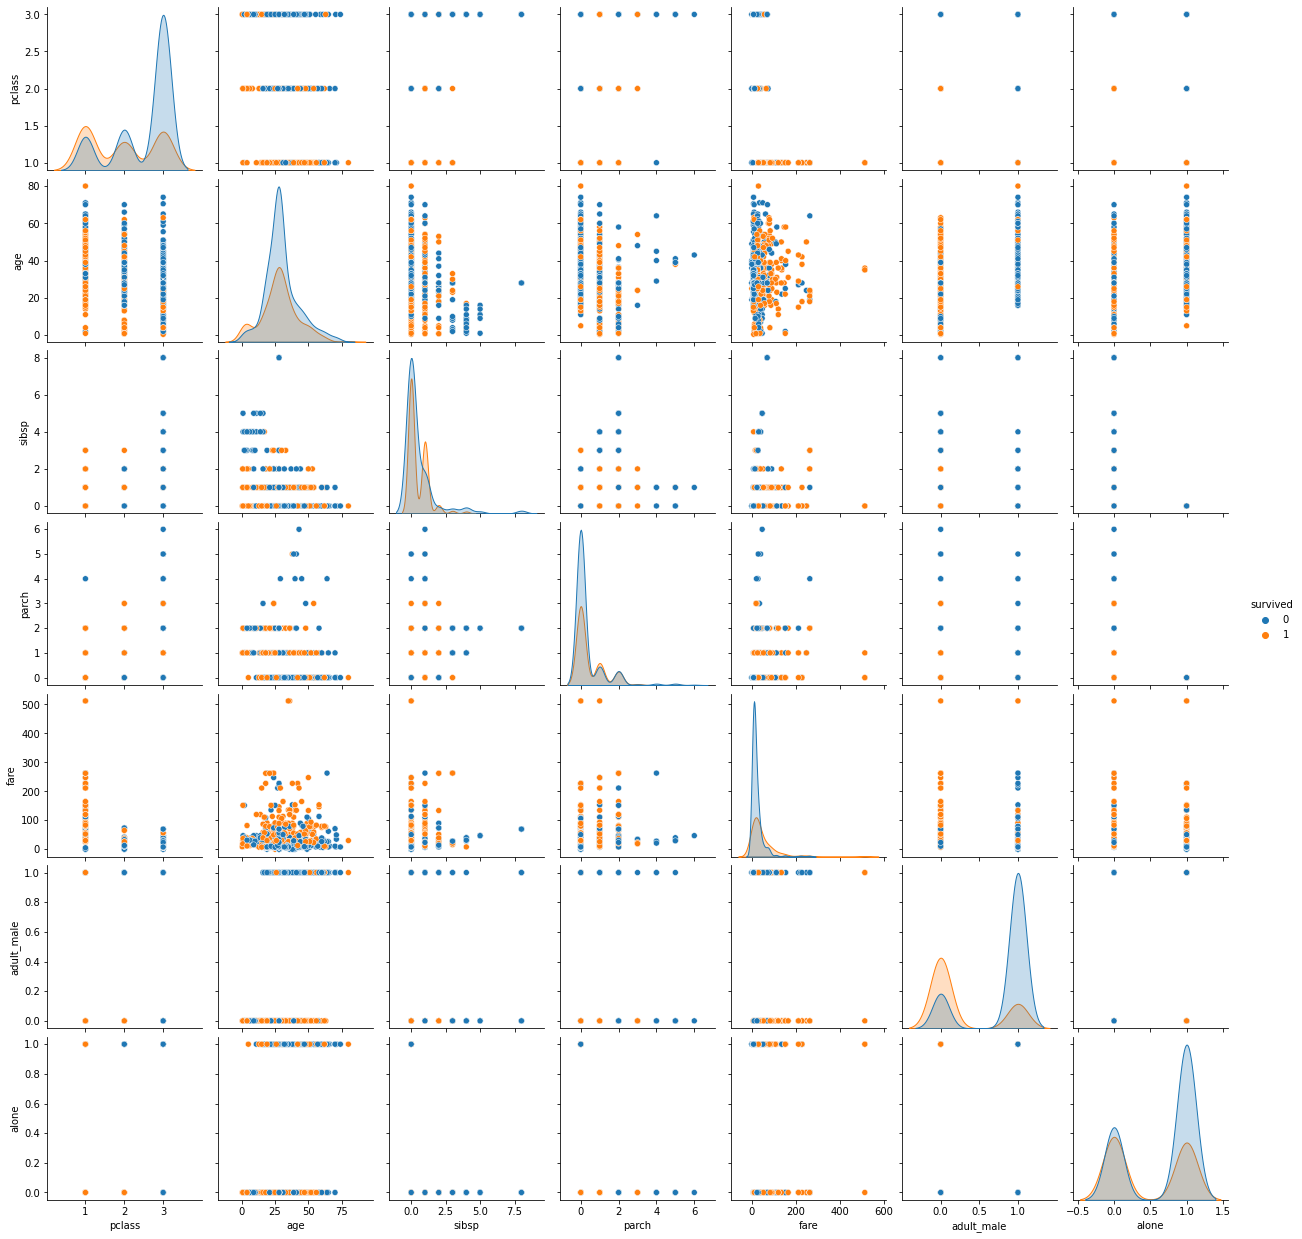

In [68]:
"""
상관계수는 연속형 데이터에서만 구할 수있으므로 데이터 형식이 int64 속성은 산점도로 가능 [float64, boolean => 산점도 불가)]
15개 중 8개 속성만 사용 가능
"""
titanic = titanic.astype({"adult_male":"int64", "alone":"int64"})
#boolean타입인 adult_male과 alone을 int로 변경
#boolean타입은 산점도에 그릴 수 없게됨
sns.pairplot(titanic, hue="survived")
#사용 가능한 속성들만 출력
plt.show()


##### A1열부터 대각선으로 관계가 보이고, 그 외는 의미X
##### 대체적으로 분석할 관계가 보이지는 않음

##### 두 변수간 상관관계를 시각화

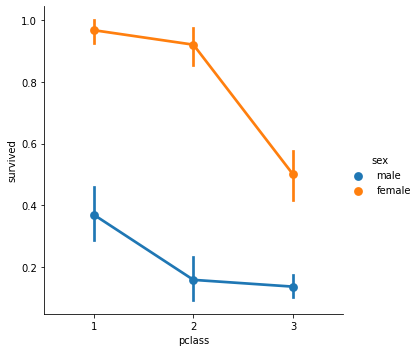

In [69]:
sns.catplot(x="pclass", y="survived", hue="sex", data=titanic, kind="point")
plt.show()

대체적으로 여성의 생존률이 남성의 생존률보다 높은편이며,
1,2,3등석 중 1등석의 생존률이 높다.

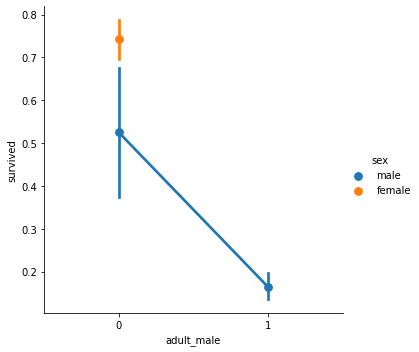

In [70]:
sns.catplot(x="adult_male", y="survived", hue="sex", data=titanic, kind="point")
plt.show()

##### 변수 사이 상관계수를 히트맵으로 시각화

In [71]:
#연령대 가져오기 함수
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7


In [72]:
#나이대(0~9,10~19,20~29 ...) 컬럼 추가
titanic["age_band"] = titanic["age"].apply(category_age)

In [77]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_band,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,1,C,Southampton,no,0,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,0,C,Southampton,yes,1,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,1,C,Southampton,no,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,1,C,Southampton,no,1,2,1
887,1,1,0,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1,1,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,0,C,Southampton,no,0,2,4
889,1,1,1,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1,2,1


In [74]:
#성별 데이터 0,1로 변경(성별의 타입은 objects인데 objects는 시각화 불가)
titanic["sex"] = titanic["sex"].map({"male":1, "female":0})

In [75]:
titanic["family"] = titanic["sibsp"] + titanic["parch"] + 1

In [76]:
from base64 import encode

titanic.to_csv("./data/titanic.handling.csv", index=False, encoding="utf-8")

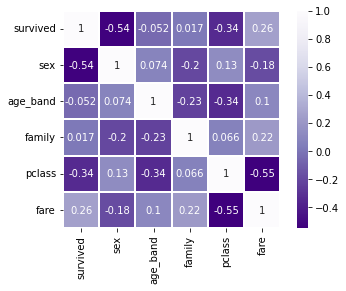

In [87]:
#히트맵 그리기
heatmap_data = titanic[["survived", "sex", "age_band", "family", "pclass", "fare"]]
color_map = plt.cm.Purples_r

sns.heatmap(data=heatmap_data.astype(float).corr(), linewidths=0.1, square=True, cmap=color_map, annot=True)
#linewidths : 사각형 간격, square : 정사각형으로 만들기 , annot : 값 넣기
plt.show()